In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
sns.set()

In [325]:
data = pd.read_csv('bank-full.csv', sep=';')
print('Base com {} linhas e {} colunas'.format(data.shape[0], data.shape[1]))

Base com 45211 linhas e 17 colunas


In [326]:
"""Sem valores nulos"""

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [327]:
"""Primeiras 5 linhas"""

data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [328]:
"""Amostra de 5 linhas"""

data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11284,44,housemaid,single,primary,no,1059,no,no,unknown,18,jun,2093,1,-1,0,unknown,yes
38860,25,admin.,single,secondary,no,845,yes,no,cellular,18,may,217,1,370,1,failure,no
29518,27,management,single,secondary,no,924,yes,no,cellular,3,feb,84,1,-1,0,unknown,no
9401,60,technician,married,tertiary,no,0,no,no,unknown,6,jun,320,1,-1,0,unknown,no
38931,30,technician,married,secondary,no,1211,yes,no,cellular,18,may,176,1,-1,0,unknown,no


### Análise Descritiva 

* A media de idade dos clientes é de 41 anos. Sendo a idade mínima de 18 anos e a máxima 95 anos.
* Saldo médio anual dos clientes é de 1362 euros.
* A média foram de 2 ligações para cada cliente, sendo o máximo de 63 que podemos considerar como outlier.


In [329]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


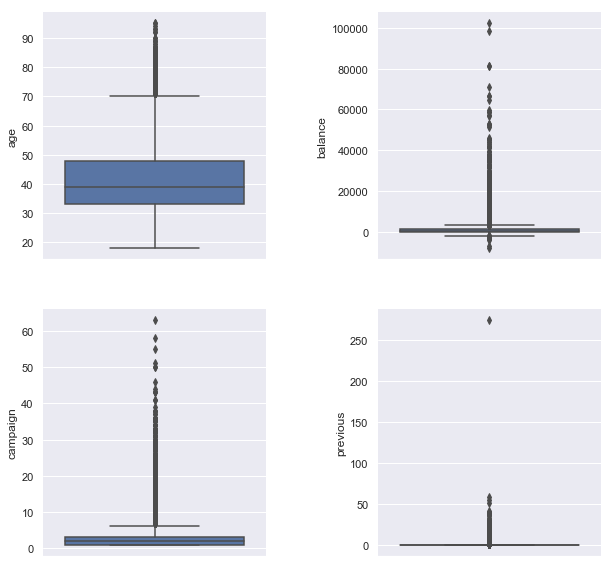

In [330]:
f, axes = plt.subplots(2,2, figsize=(10,10), sharex=True)

plt.subplots_adjust(wspace=0.5)

sns.despine(left=True)

sns.boxplot( x= 'age',  data=data, orient='v',ax=axes[0,0])

sns.boxplot( x= 'balance',  data=data, orient='v',ax=axes[0,1])

sns.boxplot( x= 'campaign',  data=data, orient='v',ax=axes[1,0])

sns.boxplot( x= 'previous',  data=data, orient='v',ax=axes[1,1]);

### Como estão distribuidos os clientes pelo critério profissões?

In [331]:
print(data['job'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


### Clientes por escolaridade 

In [332]:
print(data['education'].value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


### Qual a eficiciência da campanha de marketing? 

Pode-se observar uma efetividade da campanha de marketing de 8%. Esse número não é ruim, porém a análise visa encontrar formas de melhorar este índice de conversão.

In [333]:
data['y'].shape[0]/data['y'].value_counts()[1]

8.548118737001323

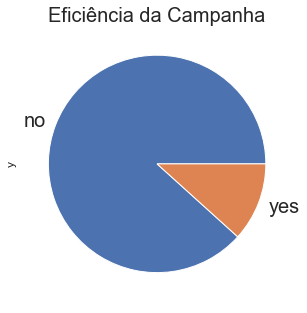

In [334]:
plt.figure(figsize=(8,5))

data['y'].value_counts().plot(kind = 'pie', fontsize=20)

plt.title('Eficiência da Campanha', size=20);

### Transformando yes = 1 e no = 0

In [335]:
columns =['default', 'housing', 'loan', 'y']

for column in columns:
    data[column] = pd.get_dummies(data[column])

In [336]:
data.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28859,37,blue-collar,divorced,secondary,1,-175,0,1,cellular,30,jan,638,4,266,1,failure,1
19763,33,housemaid,married,primary,1,0,1,1,cellular,8,aug,138,2,-1,0,unknown,1
31773,35,blue-collar,married,secondary,1,2926,0,1,cellular,8,apr,182,1,292,25,failure,1


### Saldo médio por estado civil

Até pelo fato da divisão de bens, os clientes divorciados mantém uma média menor em relação aos solteiros e casados.

In [337]:
data.groupby('marital').mean()[['balance']]

,balance
marital,
divorced,1178.872287
married,1425.925590
single,1301.497654


In [338]:
data.groupby(['job']).mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
job,,,,,,,,,,,
admin.,39.289886,0.985689,1135.838909,0.384645,0.808354,15.564301,246.896732,2.575324,47.859021,0.671630,0.877973
blue-collar,40.044081,0.979346,1078.826654,0.275791,0.826963,15.442561,262.901562,2.816995,44.033498,0.505138,0.927250
entrepreneur,42.190989,0.963013,1521.470074,0.415602,0.760592,15.702085,256.309348,2.799597,32.486214,0.478144,0.917283
housemaid,46.415323,0.982258,1392.395161,0.679032,0.877419,16.002419,245.825000,2.820968,21.505645,0.371774,0.912097
management,40.449567,0.982660,1763.616832,0.505392,0.867520,16.114189,253.995771,2.864348,38.665468,0.668006,0.862444
retired,61.626767,0.988516,1984.215106,0.783127,0.863516,15.439488,287.361307,2.346731,37.443905,0.638693,0.772085
self-employed,40.484484,0.979101,1647.970868,0.515516,0.854972,16.027866,268.157061,2.853072,34.747308,0.551615,0.881571
services,38.740250,0.981945,997.088108,0.334136,0.798748,15.635532,259.318729,2.718344,41.995185,0.501204,0.911170
student,26.542644,0.996802,1388.060768,0.734542,0.987207,14.897655,246.656716,2.299574,57.041578,0.953092,0.713220


## 1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

### A profissão "Management" tem o maior volume de empréstimo, sendo o empréstimo pessoal a opção mais utilizada por estes clientes.

In [339]:
loan_by_job = data[['job', 'housing', 'loan']]

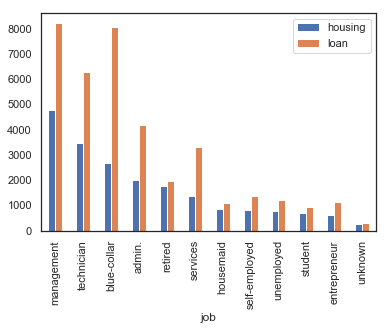

In [360]:
loan_by_job.groupby(['job']).sum().sort_values(['housing'], ascending=False).plot(kind='bar');

## 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?


### Demostra que os produtos oferecidos pelo banco tem boa aceitação por parte dos clientes. Com até 2 ligações foi possível atingir 65% de sucesso.

## 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

### Com 2 ligações é possível atingir 65% de adesão e o máximo recomendado é de 4 ligações quando se atinge 85% de adesão.

In [341]:
data.groupby(['campaign']).sum().head(10)

,age,default,balance,housing,loan,day,duration,pdays,previous,y
campaign,,,,,,,,,,
1,713423,17252.0,24825824,7426.0,14715.0,258702,4579925,868054,10814,14983.0
2,511875,12297.0,17069430,5648.0,10555.0,194185,3442952,502417,7401,11104.0
3,226010,5417.0,7456753,2382.0,4622.0,88922,1499718,206536,3340,4903.0
4,146514,3451.0,4400512,1712.0,2960.0,59722,891751,96958,1607,3205.0
5,73097,1722.0,2177432,765.0,1481.0,29641,406692,58562,1092,1625.0
6,53960,1271.0,1696252,665.0,1085.0,22886,280255,36463,920,1199.0
7,30693,721.0,1016493,342.0,615.0,13003,156812,22566,487,688.0
8,22475,521.0,704150,266.0,456.0,9989,104936,12907,292,508.0
9,13196,320.0,546521,162.0,283.0,6226,71950,5772,108,306.0


## 4. O resultado da campanha anterior tem relevância na campanha atual?

### De certa forma sim:
* 30% dos clientes que não converteram na campanha anterior, converteram na campanha atual.
* 11% dos clientes que converteram na campanha anterior também converteram na atual.

In [343]:
data.groupby(['poutcome']).sum()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
poutcome,,,,,,,,,,,
failure,199893,4862.0,7183913,1431.0,4127.0,69431,1196755,9708,1183637,14196,4283.0
other,73144,1824.0,2736837,641.0,1575.0,26634,470516,4529,422618,7377,1533.0
success,64920,1509.0,2930284,1040.0,1429.0,21833,478789,2729,246685,4647,533.0
unknown,1512810,36201.0,48738648,16969.0,30836.0,596726,9525751,107990,-35556,17,33573.0


## 5. Qual o fator determinante para que o banco exija um seguro de crédito?

### Existe uma pequena correlação, porém positiva entre o saldo médio anual e empréstimo pessoal já utilizado pelo cliente. Por esta razão se o cliente não atende estes requisitos o banco pode exigir o seguro.

In [344]:
corr = data.corr()

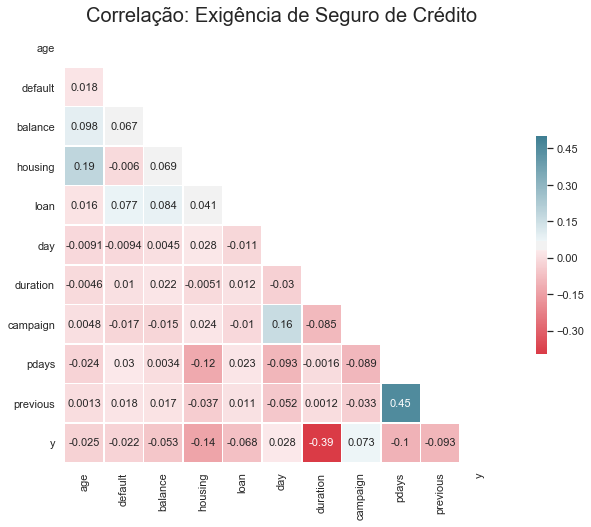

In [345]:
sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Insert the graphic
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Draw heat map mask
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlação: Exigência de Seguro de Crédito', fontsize=20);

## 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

### As principais características são idade média de 43 anos e saldo médio anual de 1600 euros.

In [346]:
X = data[['age', 'default', 'balance', 'loan']]
y = data['housing']

In [347]:
'''Transformando as varíaveis categóricas em númericas para utilização do RandomForest'''

job_dummies = pd.get_dummies(data['job'])

marital_dummies = pd.get_dummies(data['marital'])

In [348]:
'''Juntando as varíaveis em um único dataframe'''
X = pd.concat([X, job_dummies, marital_dummies], axis=1)
X.head(5)

,age,default,balance,loan,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
0,58,1,2143,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,1,29,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,1,1506,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [349]:
clf= RandomForestClassifier(random_state=0, n_jobs=-1)
model = clf.fit(X, y)

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [350]:
'''Seleção das varíaveis mais importantes para prever se o banco irá financiar um imóvel para o cliente'''

importances = model.feature_importances_
importances

array([0.19984065, 0.00460205, 0.68802299, 0.01217447, 0.00409844,
       0.02912384, 0.00182722, 0.00404366, 0.00383889, 0.01638201,
       0.00187576, 0.00607822, 0.00645841, 0.00239644, 0.00234779,
       0.00474447, 0.00320737, 0.0047896 , 0.00414774])

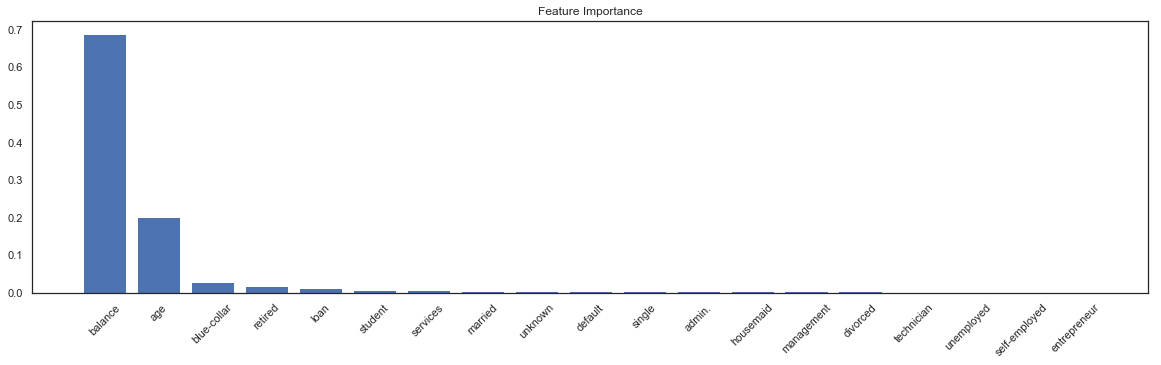

In [351]:
# Reorganizando a importância em ordem decrescente
indices = np.argsort(importances)[::-1]

# Reorganizando os nomes das variávies afim de coincidir com importância da variável
names = [X.columns[i] for i in indices]

# Criação do gráfico

plt.figure(figsize=(20,5))

plt.title('Feature Importance')

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=45)

plt.show()

In [352]:
data.groupby(['housing']).mean()

,age,default,balance,loan,day,duration,campaign,pdays,previous,y
housing,,,,,,,,,,
0,39.175288,0.982690,1175.103064,0.826224,15.598249,259.331476,2.698488,51.312495,0.656665,0.923000
1,43.139883,0.981077,1596.501270,0.856730,16.066929,256.700911,2.845625,26.288581,0.484787,0.832976
